# **1. Cài đặt một số thư viện**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **2. Cài đặt dữ liệu**

In [ ]:
dataset = pd.read_csv('Restaurant_Reviews.csv')
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


# **3. Làm sạch dữ liệu**

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk, re
import string
nltk.download('stopwords')
stop_word_list = set(stopwords.words('english'))
porter_stemmer = PorterStemmer()
corpus = []
dataset['Review'] = dataset['Review'].str.replace('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{}~1234567890]', '')
dataset['Review'] = dataset['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_word_list)]))
dataset['Review'] = dataset['Review'].apply(lambda x : ' '.join([porter_stemmer.stem(y) for y in x.split()]))
corpus = dataset['Review'].values.tolist()
dataset


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':


,Review,Liked
0,wow love place,1
1,crust good,0
2,not tasti textur nasti,0
3,stop late may bank holiday rick steve recommen...,1
4,the select menu great price,1
...,...,...
995,i think food flavor textur lack,0
996,appetit instantli gone,0
997,overal i impress would go back,0
998,the whole experi underwhelm i think well go ni...,0


In [ ]:
print(corpus)

['wow love place', 'crust good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'the select menu great price', 'now i get angri i want damn pho', 'honeslti didnt tast that fresh', 'the potato like rubber could tell made ahead time kept warmer', 'the fri great', 'a great touch', 'servic prompt', 'would go back', 'the cashier care ever i say still end wayyy overpr', 'i tri cape cod ravoli chicken cranberrymmmm', 'i disgust i pretti sure human hair', 'i shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'thi place worth time let alon vega', 'like', 'the burritto blah', 'the food amaz', 'servic also cute', 'i could care less the interior beauti', 'so perform', 'that rightth red velvet cakeohhh stuff good', 'name', 'thi hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm our sever run around like total overwhelm', 'the worst salmon sashimi', 'also combo like burger fri beer decent deal

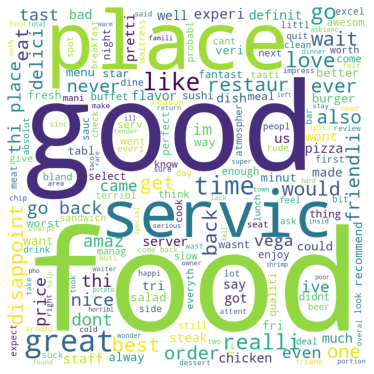

In [ ]:
from wordcloud import WordCloud
def create_wordcloud():
  for i in range(len(corpus)):
    corpus[i] = corpus[i].lower()
  comment_words = ''
  comment_words += " ".join(corpus)+" "
  wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_word_list,
                min_font_size = 10).generate(comment_words)
  plt.figure(figsize = (5, 5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.show()
create_wordcloud()
    # a list contains texts

# **4. Tạo mô hình Bag of Words**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(corpus)
# vectorizer.get_feature_names_out()
# X = X.toarray()
# y = dataset.iloc[:, 1]
X = dataset.Review.values
y = dataset.Liked.values

# **5. Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

# **6. Huấn luyện Naive Bayes model trên dữ liệu**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)

# **7. Dự đoán kết quả trên dữ liệu kiểm tra**

In [ ]:
y_pred = gnb.predict(X_test)

# **8. Đánh giá kết quả dự đoán bằng Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[54, 43],
       [10, 93]])